In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sn
%matplotlib inline
import pandas as pd
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


In [14]:
df = pd.read_csv("/home/growlt199/Downloads/manufacturing_project/data/flight_processed_data.csv",index_col=0)

In [15]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955


In [4]:
# Replace string values with integers
df1 = df.replace({'class': {'Economy': 0, 'Business': 1}})

In [5]:
df1.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,travel_route
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,0,2.17,1,5953,Delhi-Mumbai
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,0,2.33,1,5953,Delhi-Mumbai
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,0,2.17,1,5956,Delhi-Mumbai
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,0,2.25,1,5955,Delhi-Mumbai
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,0,2.33,1,5955,Delhi-Mumbai


In [6]:
#removing colums which i dont want to use in model 
df1.drop(['flight', 'source_city','destination_city'],axis=1,inplace=True)

In [7]:
df1.head()

,airline,departure_time,stops,arrival_time,class,duration,days_left,price,travel_route
0,SpiceJet,Evening,zero,Night,0,2.17,1,5953,Delhi-Mumbai
1,SpiceJet,Early_Morning,zero,Morning,0,2.33,1,5953,Delhi-Mumbai
2,AirAsia,Early_Morning,zero,Early_Morning,0,2.17,1,5956,Delhi-Mumbai
3,Vistara,Morning,zero,Afternoon,0,2.25,1,5955,Delhi-Mumbai
4,Vistara,Morning,zero,Morning,0,2.33,1,5955,Delhi-Mumbai


In [16]:
df1=df.copy()

In [17]:
# get dummy variables for multiple columns
dummy_cols = ['airline', 'departure_time','arrival_time','travel_route','stops']
df1_dummy = pd.get_dummies(df1[dummy_cols])

# concatenate original DataFrame with dummy variable DataFrame
df1_concat = pd.concat([df1.drop(dummy_cols, axis=1), df1_dummy], axis=1)

# display result
df1_concat.head()

KeyError: "['travel_route'] not in index"

In [ ]:
#create x and y where x are features for the model and y as target
x = df1_concat.drop('price',axis=1)
y = df1_concat['price']

In [18]:
#use sklearn train test spilt for spilt our data in parts like training data and testing data 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state =101, shuffle=True)

#print shape of x train,y train, x test and y test 
print('x_train shape:-',x_train.shape)
print('x_test shape:-',x_test.shape)
print('y_train shape:-',y_train.shape)
print('y_test shape:-',y_test.shape)


#import model from sklearn
from sklearn.ensemble import RandomForestRegressor
print('model name :- random forest regression')

regr = RandomForestRegressor(random_state=123)

#training model input as x_train and y_tarin
regr.fit(x_train,y_train)

print('score on the testing data :-',regr.score(x_test,y_test))
print('score on the training data :-',regr.score(x_train,y_train))

#finding error methods 
from sklearn import metrics

#model is creted show give x test data as input and retuen predictd data 
predictions = regr.predict(x_test)

#MAE
print('MAE:-',metrics.mean_absolute_error(y_test,predictions))

#MSE
print('MSE:-',metrics.mean_squared_error(y_test,predictions))

#RMSE
print('RMSE:-',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

#r2
print("r2",r2_score(y_test, predictions))

x_train shape:- (210100, 54)
x_test shape:- (90044, 54)
y_train shape:- (210100,)
y_test shape:- (90044,)
model name :- random forest regression
score on the testing data :- 0.9849940171396354
score on the training data :- 0.9975012023926608
MAE:- 1107.825073928752
MSE:- 7723496.46719342
RMSE:- 2779.117929702412
r2 0.9849940171396354


In [19]:
i = 0
for true_value, pred_value in zip(y_test, predictions):
    print(f"Actual: {true_value}, Predicted: {pred_value}")
    i+=1
    if i == 10:
        break

Actual: 5549, Predicted: 5548.98
Actual: 5892, Predicted: 5890.68
Actual: 37016, Predicted: 38369.87
Actual: 4500, Predicted: 4504.16
Actual: 39377, Predicted: 39456.52
Actual: 5891, Predicted: 5299.37
Actual: 23424, Predicted: 23237.32
Actual: 4502, Predicted: 4502.0
Actual: 5817, Predicted: 5804.45
Actual: 37658, Predicted: 40172.88


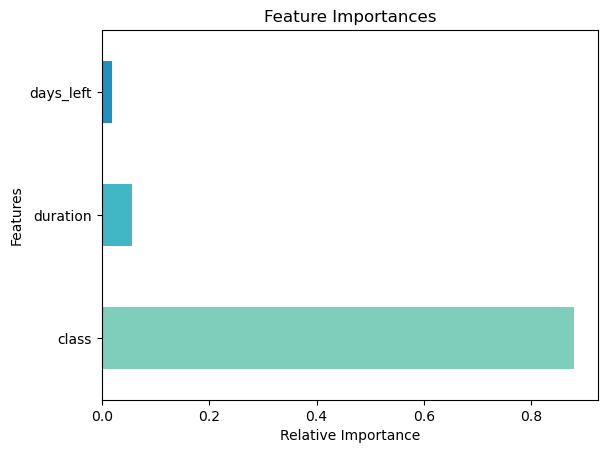

In [21]:
import matplotlib.pyplot as plt


# plot feature importances
feat_importances = pd.Series(regr.feature_importances_, index=x_train.columns)
feat_importances.nlargest(3).plot(kind='barh', color=['#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494','#081d58','#fc8d59','#ef6548','#d73027','#990000'])

# customize plot
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

 # from above i know class have more impact in my model, try to build model without that feature 

In [15]:
#removing colums which i dont want to use in model 
df2= df.drop(['flight', 'source_city','destination_city','class'],axis=1)

In [16]:
df2.head()

,airline,departure_time,stops,arrival_time,duration,days_left,price,travel_route
0,SpiceJet,Evening,zero,Night,2.17,1,5953,Delhi-Mumbai
1,SpiceJet,Early_Morning,zero,Morning,2.33,1,5953,Delhi-Mumbai
2,AirAsia,Early_Morning,zero,Early_Morning,2.17,1,5956,Delhi-Mumbai
3,Vistara,Morning,zero,Afternoon,2.25,1,5955,Delhi-Mumbai
4,Vistara,Morning,zero,Morning,2.33,1,5955,Delhi-Mumbai


In [17]:
# get dummy variables for multiple columns
dummy_cols = ['airline', 'departure_time','arrival_time','travel_route','stops']
df2_dummy = pd.get_dummies(df2[dummy_cols])

# concatenate original DataFrame with dummy variable DataFrame
df2_concat = pd.concat([df2.drop(dummy_cols, axis=1), df2_dummy], axis=1)

# display result
df2_concat.head()

,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,departure_time_Afternoon,...,travel_route_Kolkata-Hyderabad,travel_route_Kolkata-Mumbai,travel_route_Mumbai-Bangalore,travel_route_Mumbai-Chennai,travel_route_Mumbai-Delhi,travel_route_Mumbai-Hyderabad,travel_route_Mumbai-Kolkata,stops_one,stops_two_or_more,stops_zero
0,2.17,1,5953,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.33,1,5953,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2.17,1,5956,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2.25,1,5955,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,2.33,1,5955,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
#create x and y where x are features for the model and y as target
x = df2_concat.drop('price',axis=1)
y = df2_concat['price']

#use sklearn train test spilt for spilt our data in parts like training data and testing data 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state =101, shuffle=True)

#print shape of x train,y train, x test and y test 
print('x_train shape:-',x_train.shape)
print('x_test shape:-',x_test.shape)
print('y_train shape:-',y_train.shape)
print('y_test shape:-',y_test.shape)


#import model from sklearn
from sklearn.ensemble import RandomForestRegressor
print('model name :- random forest regression')

regr = RandomForestRegressor(random_state=123)

#training model input as x_train and y_tarin
regr.fit(x_train,y_train)

print('score on the testing data :-',regr.score(x_test,y_test))
print('score on the training data :-',regr.score(x_train,y_train))

#finding error methods 
from sklearn import metrics

#model is creted show give x test data as input and retuen predictd data 
predictions = regr.predict(x_test)

#MAE
print('MAE:-',metrics.mean_absolute_error(y_test,predictions))

#MSE
print('MSE:-',metrics.mean_squared_error(y_test,predictions))

#RMSE
print('RMSE:-',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

#r2
print("r2",r2_score(y_test, predictions))


x_train shape:- (210100, 53)
x_test shape:- (90044, 53)
y_train shape:- (210100,)
y_test shape:- (90044,)
model name :- random forest regression
score on the testing data :- -0.26269358270912946
score on the training data :- 0.5746186882848308
MAE:- 18429.605017922542
MSE:- 649901410.3875123
RMSE:- 25493.16399326518
r2 -0.26269358270912946


In [21]:
i = 0
for true_value, pred_value in zip(y_test, predictions):
    print(f"Actual: {true_value}, Predicted: {pred_value}")
    i+=1
    if i == 10:
        break

Actual: 5549, Predicted: 48778.5
Actual: 5892, Predicted: 43193.42499999999
Actual: 37016, Predicted: 9469.508333333333
Actual: 4500, Predicted: 4588.05
Actual: 39377, Predicted: 12114.548
Actual: 5891, Predicted: 52217.818571428565
Actual: 23424, Predicted: 11760.779833333332
Actual: 4502, Predicted: 29288.736666666664
Actual: 5817, Predicted: 5812.22
Actual: 37658, Predicted: 15741.296


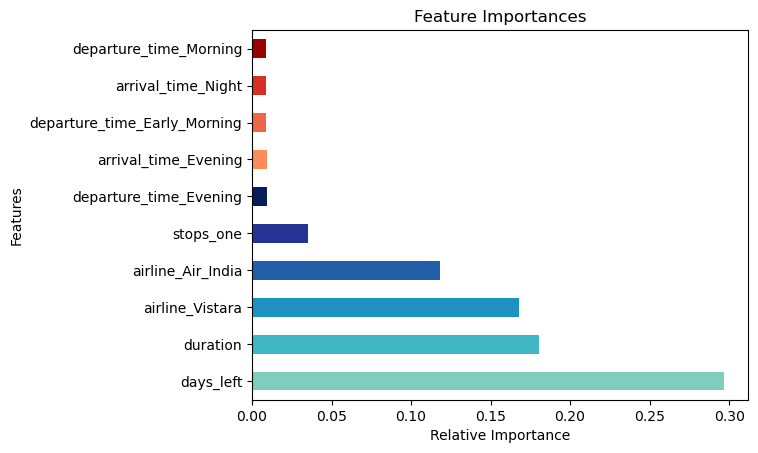

In [22]:
import matplotlib.pyplot as plt


# plot feature importances
feat_importances = pd.Series(regr.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).plot(kind='barh', color=['#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494','#081d58','#fc8d59','#ef6548','#d73027','#990000'])

# customize plot
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()